In [1]:
import yfinance as yf  # for data
import pandas_datareader.data as web
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
from pandas_datareader._utils import RemoteDataError
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
plt.rcParams['figure.figsize'] = [10, 6]
import warnings
warnings.filterwarnings('ignore')


### Getting data

Daiy data can be easily imported using `pandas_datareader`. For shorter intervals I will be using `yfinance`

In [2]:
# How yfinance can be used ""

data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SPY",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "7d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = False,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2020-10-13 09:30:00-04:00,352.200012,352.209991,352.149994,352.170013,2280110
2020-10-13 09:31:00-04:00,352.200012,352.230011,351.864990,352.174988,305507
2020-10-13 09:32:00-04:00,352.160004,352.160004,351.850006,351.920013,260073
2020-10-13 09:33:00-04:00,351.899994,352.079987,351.790009,351.890015,265041
2020-10-13 09:34:00-04:00,351.880005,351.970001,351.609985,351.970001,234070
...,...,...,...,...,...
2020-10-21 15:55:00-04:00,343.369995,343.519989,343.299988,343.350006,428576
2020-10-21 15:56:00-04:00,343.350006,343.369995,343.190002,343.210114,481671
2020-10-21 15:57:00-04:00,343.214996,343.299988,343.049988,343.059998,441632


In [ ]:
data = yf.download(tickers = "SPY",period = "7d",interval = "1m",group_by = 'ticker',auto_adjust = True,prepost = False,threads = True,proxy = None)



In [61]:
data = data.reset_index()
data

,Datetime,Open,High,Low,Close,Volume
0,2020-10-13 09:30:00-04:00,352.200012,352.209991,352.149994,352.170013,2280110
1,2020-10-13 09:31:00-04:00,352.200012,352.230011,351.864990,352.174988,305507
2,2020-10-13 09:32:00-04:00,352.160004,352.160004,351.850006,351.920013,260073
3,2020-10-13 09:33:00-04:00,351.899994,352.079987,351.790009,351.890015,265041
4,2020-10-13 09:34:00-04:00,351.880005,351.970001,351.609985,351.970001,234070
...,...,...,...,...,...,...
2718,2020-10-21 15:55:00-04:00,343.369995,343.519989,343.299988,343.350006,428576
2719,2020-10-21 15:56:00-04:00,343.350006,343.369995,343.190002,343.210114,481671
2720,2020-10-21 15:57:00-04:00,343.214996,343.299988,343.049988,343.059998,441632
2721,2020-10-21 15:58:00-04:00,343.070007,343.119995,342.910004,342.924988,567719


### Stratgeies

- Stratgey 1:Volume tarading, look for the past data, get stocks where volumes of today and yesterday are both postive and prior to that there were two days with negative volume.

- Stratgey 2:Macd trading, look for the past data where have certain pattern for macd, we are looking for intersections that indicates upper tredn

- Strategy 3: Ballinger trading, look for the past data where we have the price dipping below the lower ballinger band, for buying opportunity 
---

- Our investigation space will be the list of stocks in series_tickers file

In [10]:
#Download file "series_tickers.p" from github or create your own list of tickers
series_tickers = pickle.load(open("series_tickers.p", "rb" ))

-  here will create a class for the stock

In [89]:
class stock:
    def __init__(self,stock = 'NIO',price = 'Close'):
        self.stock = stock
        self.price = price
    
    def get_df(self):
        
        '''
        volume trading create a data frame for the stocks and manipulate it, a new column reflecting postive or negative is created, green for postive
        and red for negative
        
        inputs: 
        ------
        None
        
        returns:
        ------ 
        df : a dataframe which will be used with the subsequent  functions
        '''
        price = self.price
        df = yf.download(tickers = self.stock,period = "7d",interval = "1m",group_by = 'ticker',auto_adjust = True,prepost = False,threads = True,proxy = None)
        df['close_before'] = df[price].shift(1) 
        df['relative_price'] = df[price] - df['close_before']
        df["Color"] = np.where(df["relative_price"]<0, 'red', 'green')

        df = df.iloc[::-1]
        df = df.reset_index()
        df = df.fillna(0)
        self.df = df
        return self.df 
    
    def macd(self):
        
        '''
        macd trading, create a data frame for the stocks and manipulate it, a new column reflecting postive or negative is created, green for when macd is above the signal line
        and red for when when the macd is below singal line
        
        inputs: 
        ------
        None
        
        returns:
        ------ 
        df : a dataframe which will be used with the subsequent  functions
        '''

        
        df = self.df
        df = df.iloc[::-1]
        #Calculate the MACD and Signal Line indicators
        #Calculate the Short Term Exponential Moving Average
        ShortEMA = df['Close'].ewm(span=12, adjust=False).mean() #AKA Fast moving average
        #Calculate the Long Term Exponential Moving Average
        LongEMA = df['Close'].ewm(span=26, adjust=False).mean() #AKA Slow moving average

        #ShortEMA = df['Adj Close'].rolling(window = 12).mean() #AKA Fast moving average
        #Calculate the Long Term Exponential Moving Average
        #LongEMA = df['Adj Close'].rolling(window = 26).mean() #AKA Slow moving average
        #Calculate the Moving Average Convergence/Divergence (MACD)
        MACD = ShortEMA - LongEMA
        #Calcualte the signal line
        signal = MACD.ewm(span=9, adjust=False).mean()
        #signal = MACD.rolling(window = 9).mean()

        df['macd'] = MACD
        df['signal'] = signal
        df['macd_above'] = np.where(df['macd'] > df['signal'],'green','red')
        
        
        
        #### ballinger band
        df['Middle Band'] =df['Close'].rolling(window=20).mean()
        df['Upper Band'] = df['Middle Band'] + 1.96*df['Close'].rolling(window=20).std()
        df['Lower Band'] = df['Middle Band'] - 1.96*df['Close'].rolling(window=20).std()
        df['status_lower'] = np.where(df['Close'] < df['Lower Band'],'below_ballinger','normal')
        df['status_upper'] = np.where(df['Close'] > df['Upper Band'],'above_ballinger','normal')
            
        self.df2 = df[::-1]

        return self.df2
    
    def is_this_a_winner_volume(self,colors = ['green','green','red','red']):
        '''
        volume trading, given a condition by the user this function will return wether a stock matches that condition or not        
        inputs: 
        ------
        colors : list of colors for today and the previous 3 days, green indicates a positive volume and red indicates a negative volume
        
        returns:
        ------
        result : Boolean, True if the conditions in the colors list are met
        
        '''
        
        df = self.df
        result = np.where(df['Color'][0]== colors[0] and df['Color'][1]==colors[1] and df['Color'][2]==colors[2] and df['Color'][3]==colors[3],True,False)
        #result = np.where(df['Color'][0]=='green' and df['Color'][1]=='red' and df['Color'][2]=='red' and df['Color'][3]=='red' ,True,False)
        return result[()]
        
    def is_this_a_winner_macd(self,colors = ['green','green','red']):
        '''
        macd trading, given a condition by the user this function will return wether a stock matches that condition or not        
        inputs: 
        ------
        colors : list of colors for today and the previous 3 days, green indicates a positive volume and red indicates a negative volume
        
        returns:
        ------
        result : Boolean, True if the conditions in the colors list are met
        
        '''
        
        df = self.df2
        result = np.where(df['macd_above'][0]== colors[0] and df['macd_above'][1]==colors[1] and df['macd_above'][2]==colors[2],True,False)
        #result = np.where(df['Color'][0]=='green' and df['Color'][1]=='red' and df['Color'][2]=='red' and df['Color'][3]=='red' ,True,False)
        return result[()]
    def is_this_a_winner_ballinger(self,status_lower = ['normal','below_ballinger','below_ballinger']):
        '''
        ballinger trading, given a condition by the user this function will return wether a stock matches that condition or not        
        inputs: 
        ------
        status_lower : list of status for today and the previous 3 days, where the price is below or above ballinger ['normal','below_balinger','above_balinger']
        
        returns:
        ------
        result : Boolean, True if the conditions in the status list are met
        
        '''
        
        df = self.df2
        result = np.where(df['status_lower'][0]== status_lower[0] and df['status_lower'][1]==status_lower[1] and df['status_lower'][2]==status_lower[2],True,False)
        #result = np.where(df['Color'][0]=='green' and df['Color'][1]=='red' and df['Color'][2]=='red' and df['Color'][3]=='red' ,True,False)
        return result[()]
    
    
    def plot_df_bar(self):
        '''
        volume trading : displays a bar plot for the volume over time,green bar for positivie volume and red bar for negative volume         
        inputs: 
        '''   
        df = self.df

        df1 = df[df['relative_price']<0]
        df2 = df[df['relative_price']>=0]
        plt.bar(df1['Datetime'], df1['Volume'], color='r')
        plt.bar(df2['Datetime'], df2['Volume'], color='g')
        plt.show()
        return 
     
    def plot_df_macd(self):
        '''
        volume trading : displays a bar plot for the volume over time,green bar for positivie volume and red bar for negative volume         
        inputs: 
        '''   
        df = self.df2.iloc[1:5,:]
        plt.plot(df['Datetime'],df['signal'])
        plt.plot(df['Datetime'],df['macd']);

        return    
     
    def plot_df_ballinger(self):
        '''
        displays a bar plot for the volume over time,green bar for positivie volume and red bar for negative volume         
        inputs: 
        '''   
        df = self.df2.iloc[1:5,:]

        plt.plot(df['Datetime'], df['Close'], color='g')
        plt.plot(df['Datetime'], df['Lower Band'], color='r')
        plt.plot(df['Datetime'], df['Upper Band'], color='b')
        plt.show()
        return 
       
    
    

In [46]:
### Example: volume trading :

# how about TSLA
tsla = stock('TSLA')

tsla.get_df()

[*********************100%***********************]  1 of 1 completed


,Datetime,Open,High,Low,Close,Volume,close_before,relative_price,Color
0,2020-10-21 15:59:00-04:00,422.899994,422.999908,422.010010,422.500000,231636,422.885010,-0.385010,red
1,2020-10-21 15:58:00-04:00,422.380005,423.000000,422.109985,422.885010,150732,422.309998,0.575012,green
2,2020-10-21 15:57:00-04:00,422.894592,422.989990,422.269989,422.309998,133350,422.850006,-0.540009,red
3,2020-10-21 15:56:00-04:00,423.130005,423.170013,422.500000,422.850006,122687,423.165009,-0.315002,red
4,2020-10-21 15:55:00-04:00,422.943604,423.290009,422.850006,423.165009,108695,422.920013,0.244995,green
...,...,...,...,...,...,...,...,...,...
2718,2020-10-13 09:34:00-04:00,442.489990,442.739990,441.010010,442.019989,164946,442.270111,-0.250122,red
2719,2020-10-13 09:33:00-04:00,442.010010,443.000000,441.500000,442.270111,148173,441.850006,0.420105,green
2720,2020-10-13 09:32:00-04:00,442.268707,442.281586,441.454987,441.850006,117819,442.279999,-0.429993,red
2721,2020-10-13 09:31:00-04:00,441.750000,442.980011,441.299988,442.279999,198591,441.875000,0.404999,green


In [48]:
# let's test TSLA stock with a condition that we know it does meet


conditions= ['green','red','red','red'] 


tsla.is_this_a_winner_volume(colors = conditions)

False

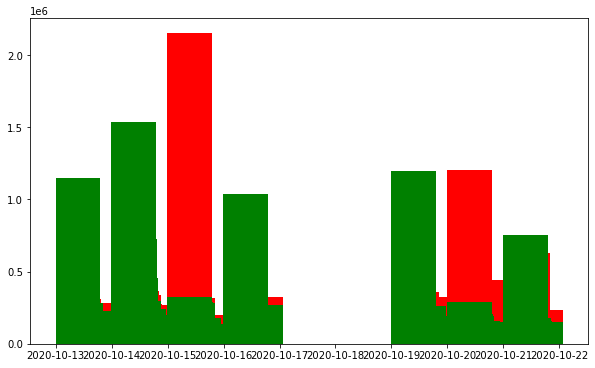

In [50]:
tsla.plot_df_bar()

In [ ]:
### Example: 
# macd trading

# let's try TSLA stock again but using macd strategy

In [90]:
tsla = stock('TSLA')
tsla.get_df()
tsla.macd()


[*********************100%***********************]  1 of 1 completed


,Datetime,Open,High,Low,Close,Volume,close_before,relative_price,Color,macd,signal,macd_above,Middle Band,Upper Band,Lower Band,status_lower,status_upper
0,2020-10-21 15:59:00-04:00,422.899994,422.999908,422.010010,422.500000,231636,422.885010,-0.385010,red,-0.497865,-0.622021,green,422.707458,423.895189,421.519728,normal,normal
1,2020-10-21 15:58:00-04:00,422.380005,423.000000,422.109985,422.885010,150732,422.309998,0.575012,green,-0.514995,-0.653061,green,422.777373,424.069253,421.485492,normal,normal
2,2020-10-21 15:57:00-04:00,422.894592,422.989990,422.269989,422.309998,133350,422.850006,-0.540009,red,-0.568568,-0.687577,green,422.837328,424.250595,421.424060,normal,normal
3,2020-10-21 15:56:00-04:00,423.130005,423.170013,422.500000,422.850006,122687,423.165009,-0.315002,red,-0.570131,-0.717329,green,422.931328,424.439745,421.422911,normal,normal
4,2020-10-21 15:55:00-04:00,422.943604,423.290009,422.850006,423.165009,108695,422.920013,0.244995,green,-0.618815,-0.754129,green,423.022328,424.711033,421.333624,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,2020-10-13 09:34:00-04:00,442.489990,442.739990,441.010010,442.019989,164946,442.270111,-0.250122,red,0.048668,0.023799,green,NaN,NaN,NaN,normal,normal
2719,2020-10-13 09:33:00-04:00,442.010010,443.000000,441.500000,442.270111,148173,441.850006,0.420105,green,0.048870,0.017581,green,NaN,NaN,NaN,normal,normal
2720,2020-10-13 09:32:00-04:00,442.268707,442.281586,441.454987,441.850006,117819,442.279999,-0.429993,red,0.022950,0.009759,green,NaN,NaN,NaN,normal,normal
2721,2020-10-13 09:31:00-04:00,441.750000,442.980011,441.299988,442.279999,198591,441.875000,0.404999,green,0.032308,0.006462,green,NaN,NaN,NaN,normal,normal


In [91]:
tsla.is_this_a_winner_ballinger(status_lower = ['normal','normal','normal'])

True

In [92]:
tsla.is_this_a_winner_macd(colors = ['green','green','green'])

True

In [93]:
tsla.is_this_a_winner_volume(colors = ['green','green','red','red'])

False

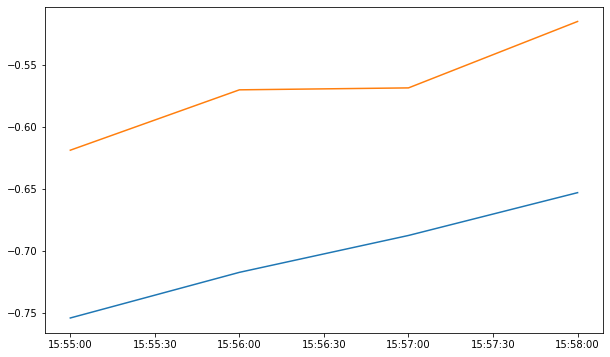

In [94]:
tsla.plot_df_macd()

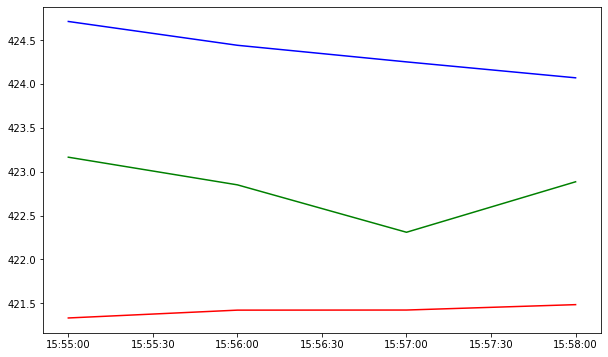

In [95]:
tsla.plot_df_ballinger()

### Hunting for winners

- Now let's look at out list of stocks and find ones that meet our condition

[*********************100%***********************]  1 of 1 completed
Vonage Holdings Corp. - Common Stock is not a winner
[*********************100%***********************]  1 of 1 completed
Cadence Design Systems, Inc. - Common Stock is not a winner
[*********************100%***********************]  1 of 1 completed
Urban One, Inc.  - Class A Common Stock is not a winner
[*********************100%***********************]  1 of 1 completed
Broadcom Inc. - Common Stock is not a winner
[*********************100%***********************]  1 of 1 completed
Adobe Inc. - Common Stock is not a winner
[*********************100%***********************]  1 of 1 completed
Alexion Pharmaceuticals, Inc. - Common Stock is not a winner
[*********************100%***********************]  1 of 1 completed
Limelight Networks, Inc. - Common Stock is not a winner
[*********************100%***********************]  1 of 1 completed
Maxim Integrated Products, Inc. - Common Stock is not a winner
[***********

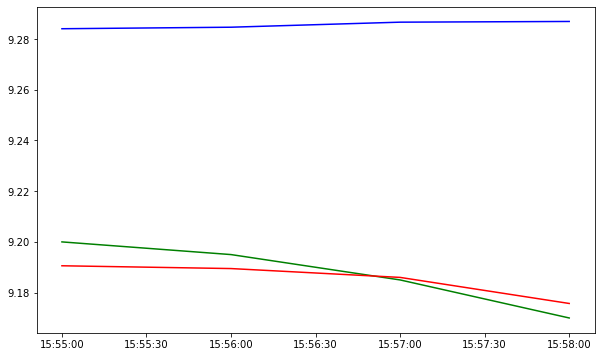

[*********************100%***********************]  1 of 1 completed
JD.com, Inc. - American Depositary Shares is not a winner
[*********************100%***********************]  1 of 1 completed
Electrameccanica Vehicles Corp. Ltd. - Common Stock is not a winner
[*********************100%***********************]  1 of 1 completed
GenMark Diagnostics, Inc. - Common Stock is not a winner
[*********************100%***********************]  1 of 1 completed
Overstock.com, Inc. - Common Stock is not a winner
[*********************100%***********************]  1 of 1 completed
Mattel, Inc. - Common Stock is not a winner
[*********************100%***********************]  1 of 1 completed
Onconova Therapeutics, Inc. - Common Stock is not a winner
[*********************100%***********************]  1 of 1 completed
iShares J.P. Morgan USD Emerging Markets Bond ETF is not a winner
[*********************100%***********************]  1 of 1 completed
Electronic Arts Inc. - Common Stock is not a 

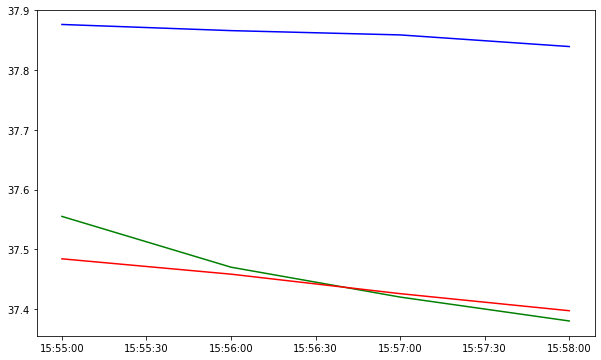

[*********************100%***********************]  1 of 1 completed
Tonix Pharmaceuticals Holding Corp. - Common Stock is a winner


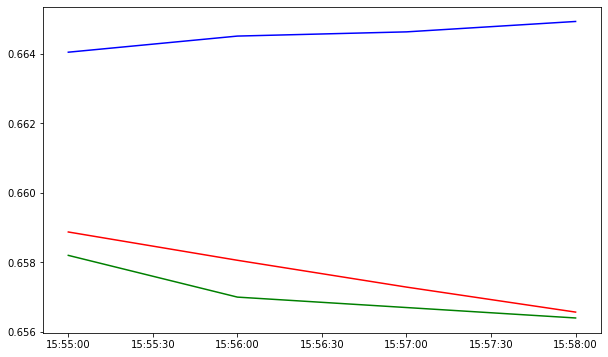

[*********************100%***********************]  1 of 1 completed
Zscaler, Inc. - Common Stock is not a winner
[*********************100%***********************]  1 of 1 completed
Moneygram International, Inc. - Common Stock is not a winner
[*********************100%***********************]  1 of 1 completed
Hologic, Inc. - Common Stock is not a winner


In [60]:
winners = []  # a list that we will append with stocks that meet out conditions

#i = 0
for ticker, name in series_tickers.iteritems():
    #i = i +1
    try:
        my_stock = stock(ticker)
        my_stock.get_df()
        my_stock.macd()
        if my_stock.is_this_a_winner_ballinger(status_lower = ['normal','below_ballinger','below_ballinger']):
            print(name,'is a winner')
            my_stock.plot_df_ballinger()
            winners.append(ticker)
        else:
            print(name,'is not a winner')
    except:
        continue
    #if i ==1:
        #break


- Finally let's look at the list of our winners

In [ ]:
winners

In [ ]:
# very short list , we need to adjust the pattern so we got more stocks

In [8]:
my_stock = stock('VG')
my_stock.get_df()
my_stock.macd()
my_stock.is_this_a_winner_ballinger(status_lower= ['normal','normal','normal'])
         

[*********************100%***********************]  1 of 1 completed


True